### OUTLIERS

Which Machine LEarning Models Are Sensitive To Outliers?

1.Naivye Bayes Classifier--- Not Sensitive To Outliers

2.SVM-------- Not Sensitive To Outliers

3.Linear Regression---------- Sensitive To Outliers

4.Logistic Regression------- Sensitive To Outliers

5.Decision Tree Regressor or Classifier---- Not Sensitive

6.Ensemble(RF,XGboost,GB)------- Not Sensitive

7.KNN--------------------------- Not Sensitive

8.Kmeans------------------------ Sensitive

9.Hierarichal------------------- Sensitive

10.PCA-------------------------- Sensitive

11.Neural Networks-------------- Sensitive

In [1]:
df=pd.read_csv("C:\\Users\\Pratik1\Desktop\dataset\\data's\\train.csv")   #loading a titanic dataset
df.head()

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()   #check for null values

177

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Count'>

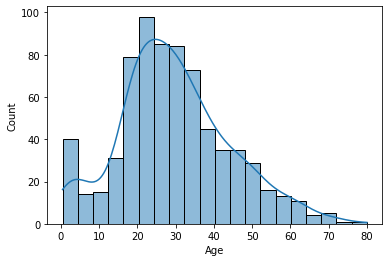

In [7]:
sns.histplot(df['Age'].dropna(),kde=True)   #plotting hisplot for age column with kde and dropping na values

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Count'>

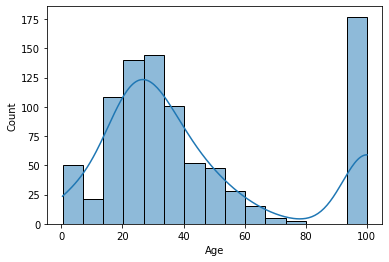

In [8]:
sns.histplot(df['Age'].fillna(100),kde=True)    #plotting a hist plot by filling with 100 i.e na values

In [11]:
'''sns.histplot(df['Age'],bins=50)
plt.figure(figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("No of passengers")'''

'sns.histplot(df[\'Age\'],bins=50)\nplt.figure(figsize=(10,8))\nplt.xlabel("Age")\nplt.ylabel("No of passengers")'

GAUSSIAN DISTRIBUTION

Text(0, 0.5, 'No of passengers')

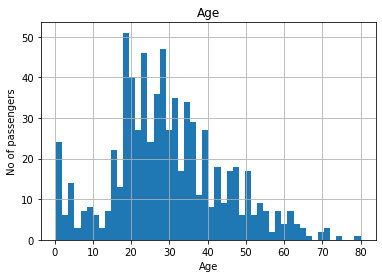

In [12]:
#check whether age column follows gaussian distribution or not
figure=df.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of passengers")

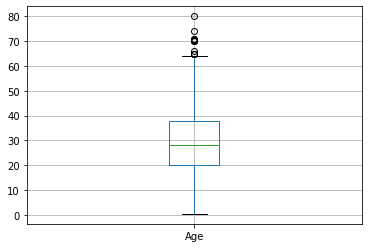

In [13]:
#checking a outliers with boxplot
figure=df.boxplot(column="Age")

In [14]:
#getting 25% tile and etc of age column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

ASSUME AGE FOLLOWS GAUSSIAN DISTRIBUTION WE WILL CALCULATE BOUNDRIES WHICH DIFFERENTIATES THE OUTLIERS

In [16]:
df['Age'].mean()   #avearage of age column

29.69911764705882

In [17]:
#setting upper boundary by adding 3 times std deviation
upper_boundary=df['Age'].mean() +3* df['Age'].std()   
upper_boundary

73.27860964406095

In [18]:
#setting lower boundary by substarcting 3 times std deviation
lower_boundary=df['Age'].mean() -3* df['Age'].std()
lower_boundary

-13.88037434994331

COMPUTE INTERQUANTILE RANGE-DIFFERENCE BETWEEN 75 PERCENATILE AND 25 PERCENTILE

In [19]:
#inter quantile range
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [22]:
#lower bridge 
LOWER_BRIDGE=df['Age'].quantile(0.25)-(IQR)*1.5
LOWER_BRIDGE

-6.6875

In [24]:
#upper bridge
UPPER_BRIDGE=df['Age'].quantile(0.75)+(IQR)*1.5
UPPER_BRIDGE

64.8125

In [25]:
LOWER_BRIDGE=df['Age'].quantile(0.25)-(IQR)*3  #XTREME OUTLIER
LOWER_BRIDGE

-33.5

In [26]:
UPPER_BRIDGE=df['Age'].quantile(0.75)+(IQR)*3
UPPER_BRIDGE

91.625

#### FEATURE IS SKEEWED

Text(0, 0.5, 'No of passengers')

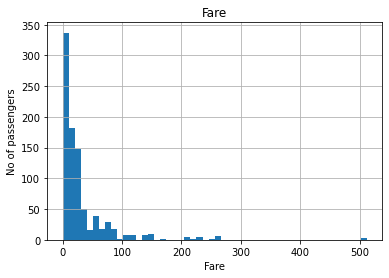

In [30]:
figure=df.Fare.hist(bins=50)  #hist for fare column
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No of passengers")    #right skeewed-at right side very less values

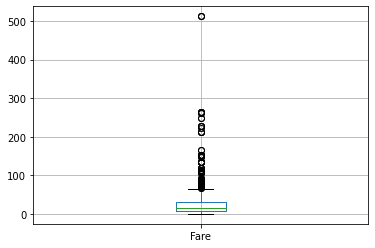

In [31]:
#check for outliers
figure=df.boxplot(column="Fare")

In [32]:
#description of fare column
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
#inter quantile range
IQR=df.Fare.quantile(0.75)-df.Age.quantile(0.25)
IQR

10.875

In [36]:
#mean of fare column
df['Fare'].mean()

32.2042079685746

In [37]:
#lower bridge as above
LOWER_BRIDGE=df['Fare'].quantile(0.25)-(IQR)*3  #XTREME OUTLIER--when data is right skeewed or left skeewed
LOWER_BRIDGE

-24.7146

In [38]:
#upper bridge as above
UPPER_BRIDGE=df['Fare'].quantile(0.75)+(IQR)*3
UPPER_BRIDGE

63.625

In [39]:
#making a copy of df
data=df.copy()

In [41]:
#replacing outliers with value of 73 which our lower bridge
data.loc[data['Age']>73,'Age']=73
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#replacing with upper boundary
data.loc[data['Fare']>100,'Fare']=100
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passengers')

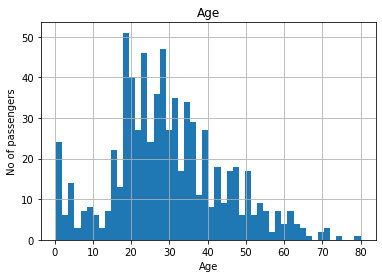

In [45]:
figure=df.Age.hist(bins=50)  #hist for age after handling outlier
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of passengers")

Text(0, 0.5, 'No of passengers')

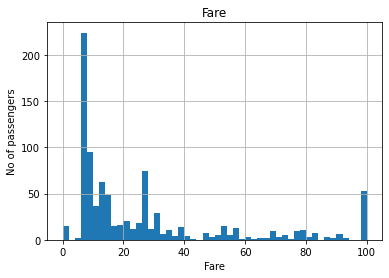

In [44]:
figure=data.Fare.hist(bins=50) #hist for fare after handling outlier
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No of passengers")

In [46]:
from sklearn.model_selection import train_test_split    #splitting a data
xtrain,xtest,ytrain,ytest=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3) #consider only columns 
# have outliers and output as survived

In [48]:
from sklearn.linear_model import LogisticRegression  #using LR
mod=LogisticRegression()
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score,roc_auc_score  #EAVLUATION OF MODEL
print("Accuracy score {}:".format(accuracy_score(ypred,ytest)))
print("ROC_AUC_SCORE {}:".format(roc_auc_score(ypred,ytest)))

Accuracy score 0.6865671641791045:
ROC_AUC_SCORE 0.7004651162790697:


In [53]:
from sklearn.ensemble import RandomForestClassifier   #USING RANDOM FOREST 
mod=RandomForestClassifier()
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
ypred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score,roc_auc_score  #EVALUATION
print("Accuracy score {}:".format(accuracy_score(ypred,ytest)))
print("ROC_AUC_SCORE {}:".format(roc_auc_score(ypred,ytest)))

Accuracy score 0.664179104477612:
ROC_AUC_SCORE 0.643775028390413:
